## Final Project: Annual Salary Analysis from 2014 to 2018

Final Project Total San Antonio City Compensation 2014-2018 datasets were acquired from https://www.sanantonio.gov/Finance/bfi/CityComp2

Each year the city of San Antonio gathers and releases information on the total compensation earned by city workers for the previouse fiscal year. In this analysis, we will be using four datasets containing information on the total compensation for the fiscal years of 2014, 2015, 2016, 2017 and 2018. Employee compensation includes base salary, certification pay, overtime, leave pay, education pay, tuition reimbursement and allowances. Total compensation includes additional benefits for employees which are contributed by the City, such as pension matching, current employee and retiree healthcare, and wellness contributions. Employees are categorized by three different categories: civilian, uniform police, or uniform fire. 

The total compensation datasets are all legal and free accessed through the website linked above. 

In my analysis, I want to calculate and evaluate the average change in salary between each year, starting from 2014 till 2018. I will take into consideration the employees annual base salary, over time, any additional benefits, job title, gender. For my 2 hypotheses, I hypothesize that each year's datasets males continually earned higher total compensation than females earned. I am predicting that males earned about 5% more than females earned each year. I also hypothesize that city employees' salary increased each year from 2014 to 2018 by 2% each year. Using these data sets, I plan on finding out which city employees have the largest and least annual salaries and whether or not it changed in each year's data set.  

## First Hypothesis: (One Sample T-Test)

H0 (null hypothesis): Each year male employees earned 5% more than female employees

HA (alternative hypothesis): Each year male employees did not earn 5% more than female employees (alpha level at .05)

## Second Hypothesis (calculated manually)

H0 (null hypothesis): City employee's salaries increased by 2% each year

HA (alternative hypothesis): City employee's salaries did not increase by 2% each year (alpha level at .05).

In [1]:
#import statements:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import statistics
from collections import Counter
import operator
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

Read in all 5 datasets and put into dataframes. Count the number of rows and columns in each dataset. 

In [2]:
#2014 DATASET

fy14_df = pd.read_csv(r'C:\Users\alido\OneDrive\Desktop\FY14City1.csv')
fy14_df

,REF #,FIRST NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY14 ANNUAL SALARY2,FY14 BASE PAY3,FY14 LEAVE PAYOUT4,FY14 OTHER5,FY14 OVERTIME6,...,FY14 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER10,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,SHERYL,SCULLEY,CIVILIAN,11/7/2005,"375,000.00","369,461.62",-,"115,203.66",-,...,"558,398.62",CITY MANAGER,CITY MANAGER,FEMALE,WHITE,2A CITY MGR FT,NaN,NaN,NaN,NaN
1,2,CASANDRA,MATEJ,CIVILIAN,6/13/2011,"183,890.98","181,466.02","11,788.00","43,296.17",-,...,"283,539.50",CVB DIRECTOR,CONVENTION AND VISITORS BUREAU,FEMALE,WHITE,2B DEPT DIR FT,NaN,NaN,NaN,NaN
2,3,CRAYTON,EARL,UNIFORM FIRE,10/15/1979,"143,598.78","96,630.66","132,976.54","4,730.00",-,...,"275,149.55",ASSISTANT FIRE CHIEF,FIRE AND EMS,MALE,BLACK,5A FIRE FULL-TIME,05/31/14,NaN,NaN,NaN
3,4,JOSEPH,SALVAGGIO,UNIFORM POLICE,11/16/1987,"100,547.98","93,138.93","6,376.80","29,453.14",-,...,"269,395.63",POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,NaN,NaN,NaN,NaN
4,5,GONZALEZ,FRANCISCA,CIVILIAN,10/1/1984,"156,937.56","142,149.21","66,396.60","14,117.00",-,...,"265,947.40",ASSISTANT TO MAYOR,MAYOR AND COUNCIL,FEMALE,HISPANIC,"2E DIR, ASST",08/18/14,NaN,NaN,NaN
5,6,ERIK,WALSH,CIVILIAN,6/6/1994,"208,845.00","206,091.00","3,825.20","6,840.00",-,...,"261,623.46",DEPUTY CITY MANAGER,CITY MANAGER,MALE,HISPANIC,2B DEPT DIR FT,NaN,NaN,NaN,NaN
6,7,PETER,ZANONI,CIVILIAN,4/2/1997,"204,750.00","202,050.00","7,500.00","6,840.00",-,...,"259,984.45",DEPUTY CITY MANAGER,CITY MANAGER,MALE,WHITE,2B DEPT DIR FT,NaN,NaN,NaN,NaN
7,8,WILLIAM,MCMANUS,UNIFORM POLICE,4/17/2006,"205,000.12","195,696.37","7,343.20","11,104.22",-,...,"257,419.66",POLICE CHIEF,POLICE,MALE,WHITE,2C F&P CHIEF FT,NaN,NaN,NaN,NaN
8,9,JESSE,RENTERIA,UNIFORM FIRE,4/18/1983,"84,600.10","84,564.40","7,151.62","24,581.52","81,349.42",...,"247,888.00",FIRE CAPTAIN,FIRE AND EMS,MALE,HISPANIC,5A FIRE FULL-TIME,NaN,NaN,NaN,NaN
9,10,CHARLES,HOOD,UNIFORM FIRE,4/16/2007,"185,407.30","182,962.40","11,460.15","9,480.00",-,...,"245,757.02",FIRE CHIEF,FIRE AND EMS,MALE,BLACK,2C F&P CHIEF FT,NaN,NaN,NaN,NaN


In [4]:
#count the number of rows in dataset:

rows14 = fy14_df.shape[0]
print("There are", rows14, "rows")

columns14 = fy14_df.shape[1]
print("There are", columns14, "columns")

There are 12931 rows
There are 22 columns


In [5]:
#2015 DATASET

fy15_df = pd.read_csv(r'C:\Users\alido\OneDrive\Desktop\FY15City1.csv',encoding = "ISO-8859-1")
fy15_df

,REF #,FIRST NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY15 ANNUAL SALARY2,FY15 BASE PAY3,FY15 LEAVE PAYOUT4,FY15 OTHER5,FY15 OVERTIME6,FY15 GROSS EARNINGS7,FY15 ADDITIONAL BENEFITS8,FY15 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER10,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE
0,1,JOSEPH,SALVAGGIO,UNIFORM POLICE,11/16/1987,"100,547.98","419,107.85",-,"55,857.28","7,083.36","482,048.49","143,760.50","625,808.99",POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,NaN
1,2,SHERYL,SCULLEY,CIVILIAN,11/7/2005,"400,000.00","392,980.87",-,"97,229.21",-,"490,210.08","74,844.42","565,054.50",CITY MANAGER,CITY MANAGER,FEMALE,WHITE,2A CITY MGR FT,NaN
2,3,GORHUM,MICHAEL,UNIFORM POLICE,5/22/1989,"102,564.02","92,307.62","179,446.02","25,089.34","1,260.49","298,103.47","54,665.51","352,768.98",POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,8/28/2015
3,4,CASANDRA,MATEJ,CIVILIAN,6/13/2011,"185,729.96","185,680.45","12,500.60","55,676.13",-,"253,857.18","50,897.88","304,755.06",CVB DIRECTOR,CONVENTION & VISITORS BUREAU,FEMALE,WHITE,2B DEPT DIR FT,NaN
4,5,PETER,ZANONI,CIVILIAN,4/2/1997,"206,797.50","206,742.38","7,953.60","16,607.09",-,"231,303.07","47,154.49","278,457.56",DEPUTY CITY MANAGER,CITY MANAGER,MALE,WHITE,2B DEPT DIR FT,NaN
5,6,ERIK,WALSH,CIVILIAN,6/6/1994,"210,933.58","210,877.35","1,216.92","16,607.09",-,"228,701.36","43,734.53","272,435.89",DEPUTY CITY MANAGER,CITY MANAGER,MALE,HISPANIC,2B DEPT DIR FT,NaN
6,7,CASTILLO,RAYMOND,UNIFORM POLICE,4/27/1981,"100,547.98","51,047.44","169,283.37","15,568.52",-,"235,899.33","30,231.54","266,130.87",POLICE CAPTAIN,POLICE,MALE,HISPANIC,5B POLICE FULL-TIME,4/10/2015
7,8,CHARLES,HOOD,UNIFORM FIRE,4/16/2007,"187,261.36","187,211.45","12,154.05","19,270.85",-,"218,636.35","45,583.19","264,219.54",FIRE CHIEF,FIRE & EMS,MALE,BLACK,2C F&P CHIEF FT,NaN
8,9,CAMPOS,MARIO,UNIFORM POLICE,4/27/1981,"81,383.90","54,777.63","146,012.00","20,845.03","2,531.84","224,166.50","35,843.72","260,010.22",POLICE SERGEANT,POLICE,MALE,HISPANIC,5B POLICE FULL-TIME,6/5/2015
9,10,CARLOS,CONTRERAS,CIVILIAN,2/1/2009,"187,496.40","187,446.42","10,816.80","16,509.56",-,"214,772.78","43,653.17","258,425.95",ASSISTANT CITY MANAGER,CITY MANAGER,MALE,HISPANIC,"2E DIR, ASST",NaN


In [6]:
#count the number of rows in dataset:

rows15 = fy15_df.shape[0]
print("There are", rows15, "rows")

columns15 = fy15_df.shape[1]
print("There are", columns15, "columns")

There are 13178 rows
There are 19 columns


In [7]:
#2016 DATASET

fy16_df= pd.read_csv(r'C:\Users\alido\OneDrive\Desktop\FY16City1.csv',encoding = "ISO-8859-1")
fy16_df


,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY16 ANNUAL SALARY2,FY16 BASE PAY3,FY16 LEAVE PAYOUT4,FY16 OTHER5,FY16 OVERTIME6,FY16 GROSS EARNINGS7,FY16 ADDITIONAL BENEFITS8,FY16 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE
0,1,SHERYL,L.,SCULLEY,CIVILIAN,11/7/2005,"425,000.00","414,615.38",-,"97,354.89",-,"511,970.27","75,379.48","587,349.75",1022-CITY MANAGER,CITY MANAGER'S OFFICE,FEMALE,WHITE,2A CITY MGR FT,NaN
1,2,JOSE,NaN,BANALES,UNIFORM POLICE,7/11/1983,"150,311.98","115,046.48","209,735.44","8,505.00",-,"333,286.92","53,896.48","387,183.40",0678-ASSISTANT POLICE CHIEF,POLICE,MALE,HISPANIC,5B POLICE FULL-TIME,7/15/2016
2,3,GERALDINE,J,GARCIA,UNIFORM POLICE,6/1/1982,"150,311.98","89,609.07","200,616.64","6,955.00",-,"297,180.71","43,075.72","340,256.43",0678-ASSISTANT POLICE CHIEF,POLICE,FEMALE,HISPANIC,5B POLICE FULL-TIME,5/6/2016
3,4,ANDREW,B,CARIAN,UNIFORM POLICE,11/16/1987,"100,547.98","85,079.06","156,189.51","20,212.79",334.11,"261,815.47","53,017.69","314,833.16",0606-POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,8/12/2016
4,5,CRIS,DANA,ANDERSEN,UNIFORM POLICE,8/17/1987,"104,603.98","81,671.57","130,915.44","18,873.67","29,419.05","260,879.73","49,544.52","310,424.25",0606-POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,7/15/2016
5,6,CASANDRA,BROWN,MATEJ,CIVILIAN,6/13/2011,"200,906.16","196,106.64","12,751.20","46,221.88",-,"255,079.72","49,355.34","304,435.06",1013-CVB DIRECTOR,CONVENTION AND VISITORS BUREAU,FEMALE,WHITE,2B DEPT DIR FT,NaN
6,7,JANAE,C,FLORANCE,UNIFORM POLICE,5/11/1987,"139,175.92","82,970.26","163,398.23","5,905.00",-,"252,273.49","42,281.39","294,554.88",0608-DEPUTY CHIEF,POLICE,FEMALE,BLACK,5B POLICE FULL-TIME,5/6/2016
7,8,MARK,E,WITHERELL,UNIFORM POLICE,10/6/1986,"102,564.02","86,784.94","132,345.64","20,705.66",-,"239,836.24","53,158.27","292,994.51",0606-POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,8/12/2016
8,9,DONALD,GENE,STRADER,UNIFORM POLICE,9/25/1989,"89,376.04","68,407.05","148,614.00","22,871.50","4,816.37","244,708.92","46,432.47","291,141.39",0605-POLICE LIEUTENANT,POLICE,MALE,WHITE,5B POLICE FULL-TIME,7/15/2016
9,10,PETER,DAMIAN,ZANONI,CIVILIAN,4/2/1997,"230,405.76","219,271.20","8,112.80","6,840.00",-,"234,224.00","48,466.71","282,690.71",1021-DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE,MALE,WHITE,2B DEPT DIR FT,NaN


In [9]:
#count the number of rows in dataset:

rows16 = fy16_df.shape[0]
print("There are", rows16, "rows")

columns16 = fy16_df.shape[1]
print("There are", columns16, "columns")

There are 13549 rows
There are 20 columns


In [10]:
#2017 DATASET

fy17_df= pd.read_csv(r'C:\Users\alido\OneDrive\Desktop\FY17City1.csv',encoding = "ISO-8859-1")
fy17_df

,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY17 ANNUAL SALARY2,FY17 BASE PAY3,FY17 LEAVE PAYOUT4,FY17 OTHER5,...,FY17 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,SHERYL,L.,SCULLEY,CIVILIAN,11/7/2005,"450,000.20","442,788.58",-,"99,329.25",...,"621,676.64",1022-CITY MANAGER,CITY MANAGER,FEMALE,WHITE (NON HISPANIC OR LATINO),2A CITY MGR FT,NaN,NaN,NaN,NaN
1,2,EDWARD,JOSEPH,WISE,UNIFORM POLICE,7/12/1993,"81,383.90","25,041.21",-,"334,802.06",...,"500,212.54",0604-POLICE SERGEANT,POLICE,MALE,HISPANIC OR LATINO,5B POLICE FULL-TIME,NaN,NaN,NaN,NaN
2,3,ANDREW,NaN,SEGOVIA,CIVILIAN,8/29/2016,"289,365.18","289,254.99","5,564.80","22,840.00",...,"377,622.83",1000-CITY ATTORNEY,CITY ATTORNEY,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN,NaN,NaN,NaN
3,4,ERIK,J,WALSH,CIVILIAN,6/6/1994,"244,414.82","241,613.63","7,231.36","6,840.00",...,"310,433.41",1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN,NaN,NaN,NaN
4,5,PETER,DAMIAN,ZANONI,CIVILIAN,4/2/1997,"239,621.98","236,875.72","8,861.60","6,840.00",...,"306,264.68",1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,WHITE (NON HISPANIC OR LATINO),2B DEPT DIR FT,NaN,NaN,NaN,NaN
5,6,DOMINIC,A,SCARAMOZI,UNIFORM POLICE,1/23/1984,"81,383.90","69,176.32","144,348.00","29,638.03",...,"293,750.13",0604-POLICE SERGEANT,POLICE,MALE,WHITE (NON HISPANIC OR LATINO),WITHDRAWN,7/31/2017,NaN,NaN,NaN
6,7,MICHAEL,L,MORRIS,UNIFORM POLICE,3/31/1986,"81,383.90","75,123.60","134,355.21","26,679.85",...,"292,337.35",0604-POLICE SERGEANT,POLICE,MALE,WHITE (NON HISPANIC OR LATINO),WITHDRAWN,9/8/2017,NaN,NaN,NaN
7,8,WILLIAM,PAUL,MCMANUS,UNIFORM POLICE,10/5/2015,"222,684.96","220,132.88","8,235.20","6,840.00",...,"285,877.32",1002-POLICE CHIEF,POLICE,MALE,WHITE (NON HISPANIC OR LATINO),2C F&P CHIEF FT,NaN,NaN,NaN,NaN
8,9,CARLOS,J.,CONTRERAS,CIVILIAN,2/1/2009,"218,312.12","215,810.06","12,110.40","6,840.00",...,"285,171.70",1032-ASSISTANT CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,"2E DIR, ASST",NaN,NaN,NaN,NaN
9,10,BEN,NaN,GORZELL,CIVILIAN,4/11/1994,"220,411.10","217,885.02","8,151.20","6,840.00",...,"283,136.33",1121-CHIEF FINANCIAL OFFICER,FINANCE,MALE,WHITE (NON HISPANIC OR LATINO),2B DEPT DIR FT,NaN,NaN,NaN,NaN


In [11]:
#count the number of rows in dataset:

rows17 = fy17_df.shape[0]
print("There are", rows17, "rows")

columns17 = fy17_df.shape[1]
print("There are", columns17, "columns")

There are 13881 rows
There are 23 columns


In [12]:
#2018 DATASET

fy18_df= pd.read_csv(r'C:\Users\alido\OneDrive\Desktop\FY18City1.csv',encoding = "ISO-8859-1")
fy18_df

,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY18 ANNUAL SALARY2,FY18 BASE PAY3,FY18 LEAVE PAYOUT4,FY18 OTHER5,FY18 OVERTIME6,FY18 GROSS EARNINGS7,FY18 ADDITIONAL BENEFITS8,FY18 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE
0,1,SHERYL,L.,SCULLEY,CIVILIAN,11/7/2005,"475,000.24","467,788.69",-,"106,805.30",-,"574,593.99","81,026.43","655,620.42",1022-CITY MANAGER,CITY MANAGER,FEMALE,WHITE (NON HISPANIC OR LATINO),2A CITY MGR FT,NaN
1,2,ANDREW,NaN,SEGOVIA,CIVILIAN,8/29/2016,"294,450.78","293,707.17","20,092.93","13,415.66",-,"327,215.76","55,447.44","382,663.20",1000-CITY ATTORNEY,CITY ATTORNEY,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN
2,3,ERIK,J,WALSH,CIVILIAN,6/6/1994,"256,733.36","253,791.00","9,494.40","6,840.00",-,"270,125.40","56,844.29","326,969.69",1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN
3,4,PETER,DAMIAN,ZANONI,CIVILIAN,4/2/1997,"251,698.98","248,814.28","9,308.00","6,840.00",-,"264,962.28","55,458.72","320,421.00",1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,WHITE (NON HISPANIC OR LATINO),2B DEPT DIR FT,NaN
4,5,ALEXANDER,RAY,DE LA GARZA,UNIFORM,3/21/1994,"103,560.08","71,637.52","163,593.87","19,479.57","20,154.17","274,865.13","41,949.17","316,814.30",0606-POLICE CAPTAIN,POLICE,MALE,HISPANIC OR LATINO,UNIFORM WITHDRAWN,6/2/2018
5,6,WILLIAM,PAUL,MCMANUS,CIVILIAN,10/5/2015,"228,285.72","227,226.87","8,650.40","10,213.76",-,"246,091.03","54,603.20","300,694.23",1002-POLICE CHIEF,POLICE,MALE,WHITE (NON HISPANIC OR LATINO),2C F&P CHIEF FT,NaN
6,7,CARLOS,J.,CONTRERAS,CIVILIAN,2/1/2009,"223,802.80","222,764.76","12,721.20","10,147.46",-,"245,633.42","54,252.42","299,885.84",1032-ASSISTANT CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,"2E DIR, ASST",NaN
7,8,BEN,NaN,GORZELL,CIVILIAN,4/11/1994,"225,954.30","224,906.31","8,562.40","10,179.18",-,"243,647.89","54,132.24","297,780.13",1121-CHIEF FINANCIAL OFFICER,FINANCE,MALE,WHITE (NON HISPANIC OR LATINO),2B DEPT DIR FT,NaN
8,9,CHARLES,N.,HOOD,CIVILIAN,4/16/2007,"216,114.34","215,111.97","13,819.95","12,673.84",-,"241,605.76","53,641.19","295,246.95",1003-FIRE CHIEF,FIRE,MALE,BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LAT...,2C F&P CHIEF FT,NaN
9,10,MARTIN,J,LANDGRAF,UNIFORM,3/31/1986,"83,820.10","71,683.83","138,879.21","25,298.17","11,490.66","247,351.87","44,353.73","291,705.60",0604-POLICE SERGEANT,POLICE,MALE,WHITE (NON HISPANIC OR LATINO),UNIFORM WITHDRAWN,7/31/2018


In [13]:
#count the number of rows in dataset:

rows18 = fy18_df.shape[0]
print("There are", rows18, "rows")

columns18 = fy18_df.shape[1]
print("There are", columns18, "columns")

There are 13881 rows
There are 20 columns


Check that each dataset can be categorized as tidy and that the appropriate columns in each dataset are integers/floats rather than strings/objects. Also count how much null values in each dataset and if there are any, fill with 0's. 

In [14]:
fy14_df.head()

,REF #,FIRST NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY14 ANNUAL SALARY2,FY14 BASE PAY3,FY14 LEAVE PAYOUT4,FY14 OTHER5,FY14 OVERTIME6,...,FY14 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER10,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,SHERYL,SCULLEY,CIVILIAN,11/7/2005,"375,000.00","369,461.62",-,"115,203.66",-,...,"558,398.62",CITY MANAGER,CITY MANAGER,FEMALE,WHITE,2A CITY MGR FT,NaN,NaN,NaN,NaN
1,2,CASANDRA,MATEJ,CIVILIAN,6/13/2011,"183,890.98","181,466.02","11,788.00","43,296.17",-,...,"283,539.50",CVB DIRECTOR,CONVENTION AND VISITORS BUREAU,FEMALE,WHITE,2B DEPT DIR FT,NaN,NaN,NaN,NaN
2,3,CRAYTON,EARL,UNIFORM FIRE,10/15/1979,"143,598.78","96,630.66","132,976.54","4,730.00",-,...,"275,149.55",ASSISTANT FIRE CHIEF,FIRE AND EMS,MALE,BLACK,5A FIRE FULL-TIME,05/31/14,NaN,NaN,NaN
3,4,JOSEPH,SALVAGGIO,UNIFORM POLICE,11/16/1987,"100,547.98","93,138.93","6,376.80","29,453.14",-,...,"269,395.63",POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,NaN,NaN,NaN,NaN
4,5,GONZALEZ,FRANCISCA,CIVILIAN,10/1/1984,"156,937.56","142,149.21","66,396.60","14,117.00",-,...,"265,947.40",ASSISTANT TO MAYOR,MAYOR AND COUNCIL,FEMALE,HISPANIC,"2E DIR, ASST",08/18/14,NaN,NaN,NaN


In [15]:
fy14_df.tail()

,REF #,FIRST NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY14 ANNUAL SALARY2,FY14 BASE PAY3,FY14 LEAVE PAYOUT4,FY14 OTHER5,FY14 OVERTIME6,...,FY14 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER10,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE,Unnamed: 19,Unnamed: 20,Unnamed: 21
12926,12927,VALERIE,GUERRERO,CIVILIAN,8/21/2014,"18,740.80",23.88,-,1.33,-,...,27.14,TEMPORARY EMPLOYEE,HUMAN RESOURCES,FEMALE,HISPANIC,4C TEMP,NaN,NaN,NaN,NaN
12927,12928,HARDY,GRISSOM,CIVILIAN,8/25/2014,"18,740.80",23.88,-,1.33,-,...,27.14,TEMPORARY EMPLOYEE,HUMAN RESOURCES,MALE,WHITE,4C TEMP,NaN,NaN,NaN,NaN
12928,12929,MOSHEIM,SANDRA,CIVILIAN,8/29/2014,"18,740.80",23.88,-,1.33,-,...,27.14,PUBLIC SERVICE ATTENDANT,HUMAN RESOURCES,FEMALE,HISPANIC,4C TEMP,09/01/14,NaN,NaN,NaN
12929,12930,SHAH,MASOOMA,CIVILIAN,8/1/2013,"25,782.38",-,1.74,-,-,...,26.62,TEACHER ASSISTANT II,PRE K 4 SA,FEMALE,ASIAN OR PACIFIC ISLANDER,4A FULL-TIME,09/12/13,NaN,NaN,NaN
12930,12931,WILLIAMS,BRITTANY,CIVILIAN,7/8/2013,"18,740.80",19.82,-,-,-,...,21.34,PUBLIC SERVICE ATTENDANT,HUMAN RESOURCES,FEMALE,WHITE,4C TEMP,10/12/13,NaN,NaN,NaN


Since the 2015, 2016, 2017, and 2018 datasets have the similiar characteristics in terms of tidiness, we don't need to check each dataset. We do want to check how each column is categorized in each dataset so we can convert the necessary columns into integers/floats. 

In [17]:
fy14_df.dtypes

REF #                          int64
FIRST NAME                    object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY14 ANNUAL SALARY2           object
FY14 BASE PAY3                object
FY14 LEAVE PAYOUT4            object
FY14 OTHER5                   object
FY14 OVERTIME6                object
FY14 GROSS EARNINGS7          object
FY14 ADDITIONAL BENEFITS8     object
FY14 TOTAL COMPENSATION9      object
JOB TITLE                     object
BUSINESS AREA                 object
GENDER10                      object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
Unnamed: 19                  float64
Unnamed: 20                  float64
Unnamed: 21                  float64
dtype: object

In [18]:
fy15_df.dtypes

REF #                         int64
FIRST NAME                   object
LAST NAME                    object
EMPLOYEE CATEGORY            object
HIRE DATE1                   object
FY15 ANNUAL SALARY2          object
FY15 BASE PAY3               object
FY15 LEAVE PAYOUT4           object
FY15 OTHER5                  object
FY15 OVERTIME6               object
FY15 GROSS EARNINGS7         object
FY15 ADDITIONAL BENEFITS8    object
FY15 TOTAL COMPENSATION9     object
JOB TITLE                    object
BUSINESS AREA                object
GENDER10                     object
ETHNIC ORIGIN10              object
EMPLOYEE SUBGROUP            object
WITHDRAW DATE                object
dtype: object

In [19]:
fy16_df.dtypes

REF #                         int64
FIRST NAME                   object
MIDDLE NAME                  object
LAST NAME                    object
EMPLOYEE CATEGORY            object
HIRE DATE1                   object
FY16 ANNUAL SALARY2          object
FY16 BASE PAY3               object
FY16 LEAVE PAYOUT4           object
FY16 OTHER5                  object
FY16 OVERTIME6               object
FY16 GROSS EARNINGS7         object
FY16 ADDITIONAL BENEFITS8    object
FY16 TOTAL COMPENSATION9     object
JOB TITLE                    object
BUSINESS AREA                object
GENDER                       object
ETHNIC ORIGIN10              object
EMPLOYEE SUBGROUP            object
WITHDRAW DATE                object
dtype: object

In [20]:
fy17_df.dtypes

REF #                          int64
FIRST NAME                    object
MIDDLE NAME                   object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY17 ANNUAL SALARY2           object
FY17 BASE PAY3                object
FY17 LEAVE PAYOUT4            object
FY17 OTHER5                   object
FY17 OVERTIME6                object
FY17 GROSS EARNINGS7          object
FY17 ADDITIONAL BENEFITS8     object
FY17 TOTAL COMPENSATION9      object
JOB TITLE                     object
BUSINESS AREA                 object
GENDER                        object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
Unnamed: 20                  float64
Unnamed: 21                  float64
Unnamed: 22                  float64
dtype: object

In [21]:
fy17_df.dtypes

REF #                          int64
FIRST NAME                    object
MIDDLE NAME                   object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY17 ANNUAL SALARY2           object
FY17 BASE PAY3                object
FY17 LEAVE PAYOUT4            object
FY17 OTHER5                   object
FY17 OVERTIME6                object
FY17 GROSS EARNINGS7          object
FY17 ADDITIONAL BENEFITS8     object
FY17 TOTAL COMPENSATION9      object
JOB TITLE                     object
BUSINESS AREA                 object
GENDER                        object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
Unnamed: 20                  float64
Unnamed: 21                  float64
Unnamed: 22                  float64
dtype: object

In [22]:
fy18_df.dtypes

REF #                         int64
FIRST NAME                   object
MIDDLE NAME                  object
LAST NAME                    object
EMPLOYEE CATEGORY            object
HIRE DATE1                   object
FY18 ANNUAL SALARY2          object
FY18 BASE PAY3               object
FY18 LEAVE PAYOUT4           object
FY18 OTHER5                  object
FY18 OVERTIME6               object
FY18 GROSS EARNINGS7         object
FY18 ADDITIONAL BENEFITS8    object
FY18 TOTAL COMPENSATION9     object
JOB TITLE                    object
BUSINESS AREA                object
GENDER                       object
ETHNIC ORIGIN10              object
EMPLOYEE SUBGROUP            object
WITHDRAW DATE                object
dtype: object

For each dataset, we will need to convert the columns annual salary, base pay, leave payout, others, overtime, gross earnings, additional ebenfits, and total compensation into floats. Also fill any Na values with 0's, although we will not be including any "unnamed' columns in the analysis. 

In order to convert the string values into floats for those columns, I want to remove all the commas from the values:

In [26]:
#ref:https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

fy14_df = fy14_df.replace(',','', regex=True)
fy14_df.head()

,REF #,FIRST NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY14 ANNUAL SALARY2,FY14 BASE PAY3,FY14 LEAVE PAYOUT4,FY14 OTHER5,FY14 OVERTIME6,...,FY14 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER10,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,SHERYL,SCULLEY,CIVILIAN,11/7/2005,375000.00,369461.62,-,115203.66,-,...,558398.62,CITY MANAGER,CITY MANAGER,FEMALE,WHITE,2A CITY MGR FT,NaN,NaN,NaN,NaN
1,2,CASANDRA,MATEJ,CIVILIAN,6/13/2011,183890.98,181466.02,11788.00,43296.17,-,...,283539.50,CVB DIRECTOR,CONVENTION AND VISITORS BUREAU,FEMALE,WHITE,2B DEPT DIR FT,NaN,NaN,NaN,NaN
2,3,CRAYTON,EARL,UNIFORM FIRE,10/15/1979,143598.78,96630.66,132976.54,4730.00,-,...,275149.55,ASSISTANT FIRE CHIEF,FIRE AND EMS,MALE,BLACK,5A FIRE FULL-TIME,05/31/14,NaN,NaN,NaN
3,4,JOSEPH,SALVAGGIO,UNIFORM POLICE,11/16/1987,100547.98,93138.93,6376.80,29453.14,-,...,269395.63,POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,NaN,NaN,NaN,NaN
4,5,GONZALEZ,FRANCISCA,CIVILIAN,10/1/1984,156937.56,142149.21,66396.60,14117.00,-,...,265947.40,ASSISTANT TO MAYOR,MAYOR AND COUNCIL,FEMALE,HISPANIC,2E DIR ASST,08/18/14,NaN,NaN,NaN


Now convert those necessary columns into floats:

In [28]:
#ref: https://datatofish.com/convert-string-to-float-dataframe/

fy14_df["FY14 ANNUAL SALARY2"] = pd.to_numeric(fy14_df["FY14 ANNUAL SALARY2"],errors='coerce')
fy14_df["FY14 BASE PAY3"] = pd.to_numeric(fy14_df["FY14 BASE PAY3"],errors='coerce')
fy14_df["FY14 LEAVE PAYOUT4"] = pd.to_numeric(fy14_df["FY14 LEAVE PAYOUT4"],errors='coerce')
fy14_df["FY14 OTHER5"] = pd.to_numeric(fy14_df["FY14 OTHER5"],errors='coerce')
fy14_df["FY14 OVERTIME6"] = pd.to_numeric(fy14_df["FY14 OVERTIME6"],errors='coerce')
fy14_df["FY14 GROSS EARNINGS7"] = pd.to_numeric(fy14_df["FY14 GROSS EARNINGS7"],errors='coerce')
fy14_df["FY14 ADDITIONAL BENEFITS8"] = pd.to_numeric(fy14_df["FY14 ADDITIONAL BENEFITS8"],errors='coerce')
fy14_df["FY14 TOTAL COMPENSATION9"] = pd.to_numeric(fy14_df["FY14 TOTAL COMPENSATION9"],errors='coerce')


In [29]:
fy14_df.dtypes

REF #                          int64
FIRST NAME                    object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY14 ANNUAL SALARY2          float64
FY14 BASE PAY3               float64
FY14 LEAVE PAYOUT4           float64
FY14 OTHER5                  float64
FY14 OVERTIME6               float64
FY14 GROSS EARNINGS7         float64
FY14 ADDITIONAL BENEFITS8    float64
FY14 TOTAL COMPENSATION9     float64
JOB TITLE                     object
BUSINESS AREA                 object
GENDER10                      object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
Unnamed: 19                  float64
Unnamed: 20                  float64
Unnamed: 21                  float64
dtype: object

In [30]:
#check how much null values in each necessary columns:
#ref: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

fy14_df.isnull().sum(axis = 0)

REF #                            0
FIRST NAME                       0
LAST NAME                        0
EMPLOYEE CATEGORY                0
HIRE DATE1                       0
FY14 ANNUAL SALARY2              2
FY14 BASE PAY3                  10
FY14 LEAVE PAYOUT4            4370
FY14 OTHER5                   2332
FY14 OVERTIME6                5192
FY14 GROSS EARNINGS7             0
FY14 ADDITIONAL BENEFITS8        8
FY14 TOTAL COMPENSATION9         0
JOB TITLE                        0
BUSINESS AREA                    0
GENDER10                         0
ETHNIC ORIGIN10                  0
EMPLOYEE SUBGROUP                0
WITHDRAW DATE                11403
Unnamed: 19                  12931
Unnamed: 20                  12931
Unnamed: 21                  12931
dtype: int64

In [31]:
#fill all Na values with 0's

fy14_df = fy14_df.fillna(0)

In [32]:
fy14_df.isnull().sum(axis= 0)

REF #                        0
FIRST NAME                   0
LAST NAME                    0
EMPLOYEE CATEGORY            0
HIRE DATE1                   0
FY14 ANNUAL SALARY2          0
FY14 BASE PAY3               0
FY14 LEAVE PAYOUT4           0
FY14 OTHER5                  0
FY14 OVERTIME6               0
FY14 GROSS EARNINGS7         0
FY14 ADDITIONAL BENEFITS8    0
FY14 TOTAL COMPENSATION9     0
JOB TITLE                    0
BUSINESS AREA                0
GENDER10                     0
ETHNIC ORIGIN10              0
EMPLOYEE SUBGROUP            0
WITHDRAW DATE                0
Unnamed: 19                  0
Unnamed: 20                  0
Unnamed: 21                  0
dtype: int64

Repeat this with the 2015, 2016, 2017, and 2018 datasets. 

In [34]:
#ref:https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

fy15_df = fy15_df.replace(',','', regex=True)
fy15_df.head()

,REF #,FIRST NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY15 ANNUAL SALARY2,FY15 BASE PAY3,FY15 LEAVE PAYOUT4,FY15 OTHER5,FY15 OVERTIME6,FY15 GROSS EARNINGS7,FY15 ADDITIONAL BENEFITS8,FY15 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER10,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE
0,1,JOSEPH,SALVAGGIO,UNIFORM POLICE,11/16/1987,100547.98,419107.85,-,55857.28,7083.36,482048.49,143760.50,625808.99,POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,NaN
1,2,SHERYL,SCULLEY,CIVILIAN,11/7/2005,400000.00,392980.87,-,97229.21,-,490210.08,74844.42,565054.50,CITY MANAGER,CITY MANAGER,FEMALE,WHITE,2A CITY MGR FT,NaN
2,3,GORHUM,MICHAEL,UNIFORM POLICE,5/22/1989,102564.02,92307.62,179446.02,25089.34,1260.49,298103.47,54665.51,352768.98,POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,8/28/2015
3,4,CASANDRA,MATEJ,CIVILIAN,6/13/2011,185729.96,185680.45,12500.60,55676.13,-,253857.18,50897.88,304755.06,CVB DIRECTOR,CONVENTION & VISITORS BUREAU,FEMALE,WHITE,2B DEPT DIR FT,NaN
4,5,PETER,ZANONI,CIVILIAN,4/2/1997,206797.50,206742.38,7953.60,16607.09,-,231303.07,47154.49,278457.56,DEPUTY CITY MANAGER,CITY MANAGER,MALE,WHITE,2B DEPT DIR FT,NaN


In [36]:
#ref: https://datatofish.com/convert-string-to-float-dataframe/

fy15_df["FY15 ANNUAL SALARY2"] = pd.to_numeric(fy15_df["FY15 ANNUAL SALARY2"],errors='coerce')
fy15_df["FY15 BASE PAY3"] = pd.to_numeric(fy15_df["FY15 BASE PAY3"],errors='coerce')
fy15_df["FY15 LEAVE PAYOUT4"] = pd.to_numeric(fy15_df["FY15 LEAVE PAYOUT4"],errors='coerce')
fy15_df["FY15 OTHER5"] = pd.to_numeric(fy15_df["FY15 OTHER5"],errors='coerce')
fy15_df["FY15 OVERTIME6"] = pd.to_numeric(fy15_df["FY15 OVERTIME6"],errors='coerce')
fy15_df["FY15 GROSS EARNINGS7"] = pd.to_numeric(fy15_df["FY15 GROSS EARNINGS7"],errors='coerce')
fy15_df["FY15 ADDITIONAL BENEFITS8"] = pd.to_numeric(fy15_df["FY15 ADDITIONAL BENEFITS8"],errors='coerce')
fy15_df["FY15 TOTAL COMPENSATION9"] = pd.to_numeric(fy15_df["FY15 TOTAL COMPENSATION9"],errors='coerce')

In [37]:
fy15_df.dtypes

REF #                          int64
FIRST NAME                    object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY15 ANNUAL SALARY2          float64
FY15 BASE PAY3               float64
FY15 LEAVE PAYOUT4           float64
FY15 OTHER5                  float64
FY15 OVERTIME6               float64
FY15 GROSS EARNINGS7         float64
FY15 ADDITIONAL BENEFITS8    float64
FY15 TOTAL COMPENSATION9     float64
JOB TITLE                     object
BUSINESS AREA                 object
GENDER10                      object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
dtype: object

In [38]:
fy15_df.isnull().sum(axis = 0)

REF #                            0
FIRST NAME                       0
LAST NAME                        0
EMPLOYEE CATEGORY                0
HIRE DATE1                       0
FY15 ANNUAL SALARY2              0
FY15 BASE PAY3                  13
FY15 LEAVE PAYOUT4            4452
FY15 OTHER5                   2785
FY15 OVERTIME6                5301
FY15 GROSS EARNINGS7             5
FY15 ADDITIONAL BENEFITS8       10
FY15 TOTAL COMPENSATION9         0
JOB TITLE                        0
BUSINESS AREA                    0
GENDER10                         0
ETHNIC ORIGIN10                  0
EMPLOYEE SUBGROUP                0
WITHDRAW DATE                12512
dtype: int64

In [39]:
fy15_df = fy15_df.fillna(0)

In [40]:
fy15_df.isnull().sum(axis = 0)

REF #                        0
FIRST NAME                   0
LAST NAME                    0
EMPLOYEE CATEGORY            0
HIRE DATE1                   0
FY15 ANNUAL SALARY2          0
FY15 BASE PAY3               0
FY15 LEAVE PAYOUT4           0
FY15 OTHER5                  0
FY15 OVERTIME6               0
FY15 GROSS EARNINGS7         0
FY15 ADDITIONAL BENEFITS8    0
FY15 TOTAL COMPENSATION9     0
JOB TITLE                    0
BUSINESS AREA                0
GENDER10                     0
ETHNIC ORIGIN10              0
EMPLOYEE SUBGROUP            0
WITHDRAW DATE                0
dtype: int64

In [42]:
#ref:https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

fy16_df = fy16_df.replace(',','', regex=True)
fy16_df.head()

,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY16 ANNUAL SALARY2,FY16 BASE PAY3,FY16 LEAVE PAYOUT4,FY16 OTHER5,FY16 OVERTIME6,FY16 GROSS EARNINGS7,FY16 ADDITIONAL BENEFITS8,FY16 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE
0,1,SHERYL,L.,SCULLEY,CIVILIAN,11/7/2005,425000.00,414615.38,-,97354.89,-,511970.27,75379.48,587349.75,1022-CITY MANAGER,CITY MANAGER'S OFFICE,FEMALE,WHITE,2A CITY MGR FT,NaN
1,2,JOSE,NaN,BANALES,UNIFORM POLICE,7/11/1983,150311.98,115046.48,209735.44,8505.00,-,333286.92,53896.48,387183.40,0678-ASSISTANT POLICE CHIEF,POLICE,MALE,HISPANIC,5B POLICE FULL-TIME,7/15/2016
2,3,GERALDINE,J,GARCIA,UNIFORM POLICE,6/1/1982,150311.98,89609.07,200616.64,6955.00,-,297180.71,43075.72,340256.43,0678-ASSISTANT POLICE CHIEF,POLICE,FEMALE,HISPANIC,5B POLICE FULL-TIME,5/6/2016
3,4,ANDREW,B,CARIAN,UNIFORM POLICE,11/16/1987,100547.98,85079.06,156189.51,20212.79,334.11,261815.47,53017.69,314833.16,0606-POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,8/12/2016
4,5,CRIS,DANA,ANDERSEN,UNIFORM POLICE,8/17/1987,104603.98,81671.57,130915.44,18873.67,29419.05,260879.73,49544.52,310424.25,0606-POLICE CAPTAIN,POLICE,MALE,WHITE,5B POLICE FULL-TIME,7/15/2016


In [43]:
#ref: https://datatofish.com/convert-string-to-float-dataframe/

fy16_df["FY16 ANNUAL SALARY2"] = pd.to_numeric(fy16_df["FY16 ANNUAL SALARY2"],errors='coerce')
fy16_df["FY16 BASE PAY3"] = pd.to_numeric(fy16_df["FY16 BASE PAY3"],errors='coerce')
fy16_df["FY16 LEAVE PAYOUT4"] = pd.to_numeric(fy16_df["FY16 LEAVE PAYOUT4"],errors='coerce')
fy16_df["FY16 OTHER5"] = pd.to_numeric(fy16_df["FY16 OTHER5"],errors='coerce')
fy16_df["FY16 OVERTIME6"] = pd.to_numeric(fy16_df["FY16 OVERTIME6"],errors='coerce')
fy16_df["FY16 GROSS EARNINGS7"] = pd.to_numeric(fy16_df["FY16 GROSS EARNINGS7"],errors='coerce')
fy16_df["FY16 ADDITIONAL BENEFITS8"] = pd.to_numeric(fy16_df["FY16 ADDITIONAL BENEFITS8"],errors='coerce')
fy16_df["FY16 TOTAL COMPENSATION9"] = pd.to_numeric(fy16_df["FY16 TOTAL COMPENSATION9"],errors='coerce')

In [44]:
fy16_df.dtypes

REF #                          int64
FIRST NAME                    object
MIDDLE NAME                   object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY16 ANNUAL SALARY2          float64
FY16 BASE PAY3               float64
FY16 LEAVE PAYOUT4           float64
FY16 OTHER5                  float64
FY16 OVERTIME6               float64
FY16 GROSS EARNINGS7         float64
FY16 ADDITIONAL BENEFITS8    float64
FY16 TOTAL COMPENSATION9     float64
JOB TITLE                     object
BUSINESS AREA                 object
GENDER                        object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
dtype: object

In [45]:
fy16_df.isnull().sum(axis = 0)

REF #                            0
FIRST NAME                       0
MIDDLE NAME                   6784
LAST NAME                        0
EMPLOYEE CATEGORY                0
HIRE DATE1                       0
FY16 ANNUAL SALARY2              0
FY16 BASE PAY3                  55
FY16 LEAVE PAYOUT4            5606
FY16 OTHER5                   2932
FY16 OVERTIME6                5513
FY16 GROSS EARNINGS7            48
FY16 ADDITIONAL BENEFITS8       18
FY16 TOTAL COMPENSATION9        15
JOB TITLE                        0
BUSINESS AREA                    0
GENDER                           0
ETHNIC ORIGIN10                  0
EMPLOYEE SUBGROUP                0
WITHDRAW DATE                11999
dtype: int64

In [46]:
fy16_df = fy16_df.fillna(0)

In [47]:
fy16_df.isnull().sum(axis = 0)

REF #                        0
FIRST NAME                   0
MIDDLE NAME                  0
LAST NAME                    0
EMPLOYEE CATEGORY            0
HIRE DATE1                   0
FY16 ANNUAL SALARY2          0
FY16 BASE PAY3               0
FY16 LEAVE PAYOUT4           0
FY16 OTHER5                  0
FY16 OVERTIME6               0
FY16 GROSS EARNINGS7         0
FY16 ADDITIONAL BENEFITS8    0
FY16 TOTAL COMPENSATION9     0
JOB TITLE                    0
BUSINESS AREA                0
GENDER                       0
ETHNIC ORIGIN10              0
EMPLOYEE SUBGROUP            0
WITHDRAW DATE                0
dtype: int64

In [49]:
#ref:https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

fy17_df = fy17_df.replace(',','', regex=True)
fy17_df.head()

,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY17 ANNUAL SALARY2,FY17 BASE PAY3,FY17 LEAVE PAYOUT4,FY17 OTHER5,...,FY17 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,SHERYL,L.,SCULLEY,CIVILIAN,11/7/2005,450000.20,442788.58,-,99329.25,...,621676.64,1022-CITY MANAGER,CITY MANAGER,FEMALE,WHITE (NON HISPANIC OR LATINO),2A CITY MGR FT,NaN,NaN,NaN,NaN
1,2,EDWARD,JOSEPH,WISE,UNIFORM POLICE,7/12/1993,81383.90,25041.21,-,334802.06,...,500212.54,0604-POLICE SERGEANT,POLICE,MALE,HISPANIC OR LATINO,5B POLICE FULL-TIME,NaN,NaN,NaN,NaN
2,3,ANDREW,NaN,SEGOVIA,CIVILIAN,8/29/2016,289365.18,289254.99,5564.80,22840.00,...,377622.83,1000-CITY ATTORNEY,CITY ATTORNEY,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN,NaN,NaN,NaN
3,4,ERIK,J,WALSH,CIVILIAN,6/6/1994,244414.82,241613.63,7231.36,6840.00,...,310433.41,1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN,NaN,NaN,NaN
4,5,PETER,DAMIAN,ZANONI,CIVILIAN,4/2/1997,239621.98,236875.72,8861.60,6840.00,...,306264.68,1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,WHITE (NON HISPANIC OR LATINO),2B DEPT DIR FT,NaN,NaN,NaN,NaN


In [50]:
#ref: https://datatofish.com/convert-string-to-float-dataframe/

fy17_df["FY17 ANNUAL SALARY2"] = pd.to_numeric(fy17_df["FY17 ANNUAL SALARY2"],errors='coerce')
fy17_df["FY17 BASE PAY3"] = pd.to_numeric(fy17_df["FY17 BASE PAY3"],errors='coerce')
fy17_df["FY17 LEAVE PAYOUT4"] = pd.to_numeric(fy17_df["FY17 LEAVE PAYOUT4"],errors='coerce')
fy17_df["FY17 OTHER5"] = pd.to_numeric(fy17_df["FY17 OTHER5"],errors='coerce')
fy17_df["FY17 OVERTIME6"] = pd.to_numeric(fy17_df["FY17 OVERTIME6"],errors='coerce')
fy17_df["FY17 GROSS EARNINGS7"] = pd.to_numeric(fy17_df["FY17 GROSS EARNINGS7"],errors='coerce')
fy17_df["FY17 ADDITIONAL BENEFITS8"] = pd.to_numeric(fy17_df["FY17 ADDITIONAL BENEFITS8"],errors='coerce')
fy17_df["FY17 TOTAL COMPENSATION9"] = pd.to_numeric(fy17_df["FY17 TOTAL COMPENSATION9"],errors='coerce')

In [51]:
fy17_df.dtypes

REF #                          int64
FIRST NAME                    object
MIDDLE NAME                   object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY17 ANNUAL SALARY2          float64
FY17 BASE PAY3               float64
FY17 LEAVE PAYOUT4           float64
FY17 OTHER5                  float64
FY17 OVERTIME6               float64
FY17 GROSS EARNINGS7         float64
FY17 ADDITIONAL BENEFITS8    float64
FY17 TOTAL COMPENSATION9     float64
JOB TITLE                     object
BUSINESS AREA                 object
GENDER                        object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
Unnamed: 20                  float64
Unnamed: 21                  float64
Unnamed: 22                  float64
dtype: object

In [52]:
fy17_df.isnull().sum(axis = 0)

REF #                            0
FIRST NAME                       0
MIDDLE NAME                   7307
LAST NAME                        0
EMPLOYEE CATEGORY                0
HIRE DATE1                       0
FY17 ANNUAL SALARY2             23
FY17 BASE PAY3                 130
FY17 LEAVE PAYOUT4            5580
FY17 OTHER5                   2787
FY17 OVERTIME6                5512
FY17 GROSS EARNINGS7           116
FY17 ADDITIONAL BENEFITS8       75
FY17 TOTAL COMPENSATION9        53
JOB TITLE                        0
BUSINESS AREA                    0
GENDER                           0
ETHNIC ORIGIN10                  0
EMPLOYEE SUBGROUP                0
WITHDRAW DATE                12094
Unnamed: 20                  13881
Unnamed: 21                  13881
Unnamed: 22                  13881
dtype: int64

In [53]:
fy17_df = fy17_df.fillna(0)

In [54]:
fy17_df.isnull().sum(axis = 0)

REF #                        0
FIRST NAME                   0
MIDDLE NAME                  0
LAST NAME                    0
EMPLOYEE CATEGORY            0
HIRE DATE1                   0
FY17 ANNUAL SALARY2          0
FY17 BASE PAY3               0
FY17 LEAVE PAYOUT4           0
FY17 OTHER5                  0
FY17 OVERTIME6               0
FY17 GROSS EARNINGS7         0
FY17 ADDITIONAL BENEFITS8    0
FY17 TOTAL COMPENSATION9     0
JOB TITLE                    0
BUSINESS AREA                0
GENDER                       0
ETHNIC ORIGIN10              0
EMPLOYEE SUBGROUP            0
WITHDRAW DATE                0
Unnamed: 20                  0
Unnamed: 21                  0
Unnamed: 22                  0
dtype: int64

In [56]:
#ref:https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

fy18_df = fy18_df.replace(',','', regex=True)
fy18_df.head()

,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY18 ANNUAL SALARY2,FY18 BASE PAY3,FY18 LEAVE PAYOUT4,FY18 OTHER5,FY18 OVERTIME6,FY18 GROSS EARNINGS7,FY18 ADDITIONAL BENEFITS8,FY18 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,WITHDRAW DATE
0,1,SHERYL,L.,SCULLEY,CIVILIAN,11/7/2005,475000.24,467788.69,-,106805.30,-,574593.99,81026.43,655620.42,1022-CITY MANAGER,CITY MANAGER,FEMALE,WHITE (NON HISPANIC OR LATINO),2A CITY MGR FT,NaN
1,2,ANDREW,NaN,SEGOVIA,CIVILIAN,8/29/2016,294450.78,293707.17,20092.93,13415.66,-,327215.76,55447.44,382663.20,1000-CITY ATTORNEY,CITY ATTORNEY,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN
2,3,ERIK,J,WALSH,CIVILIAN,6/6/1994,256733.36,253791.00,9494.40,6840.00,-,270125.40,56844.29,326969.69,1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN
3,4,PETER,DAMIAN,ZANONI,CIVILIAN,4/2/1997,251698.98,248814.28,9308.00,6840.00,-,264962.28,55458.72,320421.00,1021-DEPUTY CITY MANAGER,CITY MANAGER,MALE,WHITE (NON HISPANIC OR LATINO),2B DEPT DIR FT,NaN
4,5,ALEXANDER,RAY,DE LA GARZA,UNIFORM,3/21/1994,103560.08,71637.52,163593.87,19479.57,20154.17,274865.13,41949.17,316814.30,0606-POLICE CAPTAIN,POLICE,MALE,HISPANIC OR LATINO,UNIFORM WITHDRAWN,6/2/2018


In [57]:
#ref: https://datatofish.com/convert-string-to-float-dataframe/

fy18_df["FY18 ANNUAL SALARY2"] = pd.to_numeric(fy18_df["FY18 ANNUAL SALARY2"],errors='coerce')
fy18_df["FY18 BASE PAY3"] = pd.to_numeric(fy18_df["FY18 BASE PAY3"],errors='coerce')
fy18_df["FY18 LEAVE PAYOUT4"] = pd.to_numeric(fy18_df["FY18 LEAVE PAYOUT4"],errors='coerce')
fy18_df["FY18 OTHER5"] = pd.to_numeric(fy18_df["FY18 OTHER5"],errors='coerce')
fy18_df["FY18 OVERTIME6"] = pd.to_numeric(fy18_df["FY18 OVERTIME6"],errors='coerce')
fy18_df["FY18 GROSS EARNINGS7"] = pd.to_numeric(fy18_df["FY18 GROSS EARNINGS7"],errors='coerce')
fy18_df["FY18 ADDITIONAL BENEFITS8"] = pd.to_numeric(fy18_df["FY18 ADDITIONAL BENEFITS8"],errors='coerce')
fy18_df["FY18 TOTAL COMPENSATION9"] = pd.to_numeric(fy18_df["FY18 TOTAL COMPENSATION9"],errors='coerce')

In [58]:
fy18_df.dtypes

REF #                          int64
FIRST NAME                    object
MIDDLE NAME                   object
LAST NAME                     object
EMPLOYEE CATEGORY             object
HIRE DATE1                    object
FY18 ANNUAL SALARY2          float64
FY18 BASE PAY3               float64
FY18 LEAVE PAYOUT4           float64
FY18 OTHER5                  float64
FY18 OVERTIME6               float64
FY18 GROSS EARNINGS7         float64
FY18 ADDITIONAL BENEFITS8    float64
FY18 TOTAL COMPENSATION9     float64
JOB TITLE                     object
BUSINESS AREA                 object
GENDER                        object
ETHNIC ORIGIN10               object
EMPLOYEE SUBGROUP             object
WITHDRAW DATE                 object
dtype: object

In [59]:
fy18_df.isnull().sum(axis = 0)

REF #                            0
FIRST NAME                       0
MIDDLE NAME                   7586
LAST NAME                        0
EMPLOYEE CATEGORY                0
HIRE DATE1                       0
FY18 ANNUAL SALARY2              0
FY18 BASE PAY3                 127
FY18 LEAVE PAYOUT4            5540
FY18 OTHER5                   2453
FY18 OVERTIME6                5392
FY18 GROSS EARNINGS7           107
FY18 ADDITIONAL BENEFITS8       98
FY18 TOTAL COMPENSATION9        94
JOB TITLE                        0
BUSINESS AREA                    0
GENDER                           0
ETHNIC ORIGIN10                  0
EMPLOYEE SUBGROUP                0
WITHDRAW DATE                12380
dtype: int64

In [60]:
fy18_df = fy18_df.fillna(0)

In [61]:
fy18_df.isnull().sum(axis = 0)

REF #                        0
FIRST NAME                   0
MIDDLE NAME                  0
LAST NAME                    0
EMPLOYEE CATEGORY            0
HIRE DATE1                   0
FY18 ANNUAL SALARY2          0
FY18 BASE PAY3               0
FY18 LEAVE PAYOUT4           0
FY18 OTHER5                  0
FY18 OVERTIME6               0
FY18 GROSS EARNINGS7         0
FY18 ADDITIONAL BENEFITS8    0
FY18 TOTAL COMPENSATION9     0
JOB TITLE                    0
BUSINESS AREA                0
GENDER                       0
ETHNIC ORIGIN10              0
EMPLOYEE SUBGROUP            0
WITHDRAW DATE                0
dtype: int64

Now that we have no null values in each datasets and the necessary columns are converted into floats, we can calculate the average salary earned by each employee categorized by 2 ways: employeee catergory (civilian, uniform police, uniform fire) and by gender (male or female). 

## 2014

In [63]:
fy14_category_list=[]
fy14_avg_total_comp_list=[]

for category in fy14_df['EMPLOYEE CATEGORY'].unique():   
    print(category)
    fy14_category_list.append(category)              
    avg_total_compensation14 = round(statistics.mean(fy14_df['FY14 TOTAL COMPENSATION9'][fy14_df['EMPLOYEE CATEGORY'] == category]),2)
    print(avg_total_compensation14)
    fy14_avg_total_comp_list.append(avg_total_compensation14) 

CIVILIAN
46655.98
UNIFORM FIRE
137573.81
UNIFORM POLICE
133105.37


In [135]:
print(max(fy14_avg_total_comp_list))

137573.81


In [136]:
print("Employees under the uniform fire category earned the most total compensation in 2014")

Employees under the uniform fire category earned the most total compensation in 2014


Find the average total compensations for males and females. 

In [112]:
fy14_gender_list=[]
fy14_comp_list=[]

for gender in fy14_df['GENDER10'].unique():   
    print(gender)
    fy14_gender_list.append(gender)              
    avg_compensation14 = round(statistics.mean(fy14_df['FY14 TOTAL COMPENSATION9'][fy14_df['GENDER10'] == gender]),2)
    print(avg_compensation14)
    fy14_comp_list.append(avg_compensation14) 

FEMALE
47929.54
MALE
88514.95
UNKNOWN
7844.98


In [72]:
#Find the total average total compensation for all employees in 2014:

fy14_average_comp = round(statistics.mean(fy14_df['FY14 TOTAL COMPENSATION9']),2)
print("In 2014, San Antonio city employees earned an average of",fy14_average_comp, "total compensation.")

In 2014, San Antonio city employees earned an average of 74259.4 total compensation.


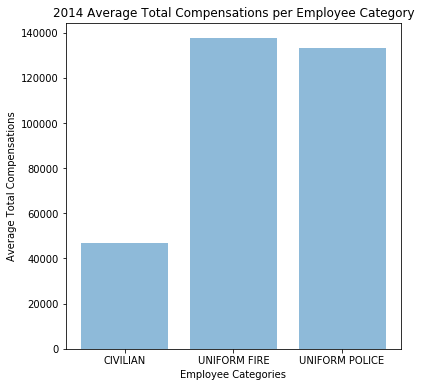

In [97]:
# Bar plot of the list of the average total compensations of categories
#ref:https://pythonspot.com/matplotlib-bar-chart/


fig,ax= plt.subplots(figsize=(6,6))

objects14 = fy14_category_list
y_pos14 = np.arange(len(objects14))
comp14 = fy14_avg_total_comp_list

plt.bar(y_pos14, comp14, align='center', alpha=0.5)
plt.xticks(y_pos14, objects14)
plt.ylabel('Average Total Compensations')
plt.xlabel('Employee Categories')
plt.title('2014 Average Total Compensations per Employee Category')

plt.show()

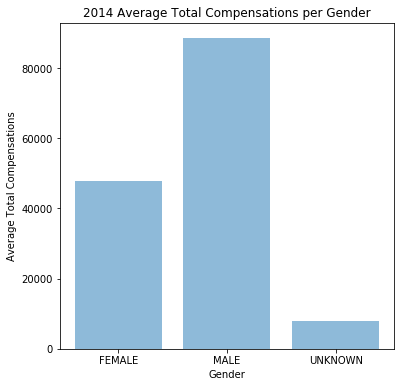

In [113]:
# Bar plot of the list of the average total compensations by gender

fig,ax= plt.subplots(figsize=(6,6))

objects14a = fy14_gender_list
y_pos14a = np.arange(len(objects14a))
comp14a = fy14_comp_list

plt.bar(y_pos14a, comp14a, align='center', alpha=0.5)
plt.xticks(y_pos14a,objects14a)
plt.ylabel('Average Total Compensations')
plt.xlabel('Gender')
plt.title('2014 Average Total Compensations per Gender')

plt.show()

Repeat for 2015, 2016, 2017, and 2018 datasets.

## 2015

In [73]:
fy15_category_list=[]
fy15_avg_total_comp_list=[]

for category in fy15_df['EMPLOYEE CATEGORY'].unique():   
    print(category)
    fy15_category_list.append(category)              
    avg_total_compensation15 = round(statistics.mean(fy15_df['FY15 TOTAL COMPENSATION9'][fy15_df['EMPLOYEE CATEGORY'] == category]),2)
    print(avg_total_compensation15)
    fy15_avg_total_comp_list.append(avg_total_compensation15) 

UNIFORM POLICE
137548.05
CIVILIAN
47269.02
UNIFORM FIRE
138445.16


In [137]:
print(max(fy15_avg_total_comp_list))

138445.16


In [138]:
print("Employees under the uniform fire category earned the most total compensation in 2015.")

Employees under the uniform fire category earned the most total compensation in 2015.


In [114]:
fy15_gender_list=[]
fy15_comp_list=[]

for gender in fy15_df['GENDER10'].unique():   
    print(gender)
    fy15_gender_list.append(gender)              
    avg_compensation15 = round(statistics.mean(fy15_df['FY15 TOTAL COMPENSATION9'][fy15_df['GENDER10'] == gender]),2)
    print(avg_compensation15)
    fy15_comp_list.append(avg_compensation15) 

MALE
90302.37
FEMALE
52407.38
 MALE 
55827.36
 FEMALE 
9820.99
 UNKNOWN 
3262.8
UNKNOWN
1365.57


In [148]:
gender_comp_list = []
gender_list = ["MALE", "FEMALE"]
male_salary_2015 = round((90302.37 + 55827.36),2)
female_salary_2015 = round((52407.38 + 9820.99),2)
gender_comp_list.extend([male_salary_2015, female_salary_2015])
print("Males earned",male_salary_2015,"in 2015. Females earned", female_salary_2015, "in 2015.")

Males earned 146129.73 in 2015. Females earned 62228.37 in 2015.


In [83]:
#Find the total average total compensation for all employees in 2015:

fy15_average_comp = round(statistics.mean(fy15_df['FY15 TOTAL COMPENSATION9']),2)
print("In 2015, San Antonio city employees earned an average of",fy15_average_comp, "total compensation.")

In 2015, San Antonio city employees earned an average of 74648.85 total compensation.


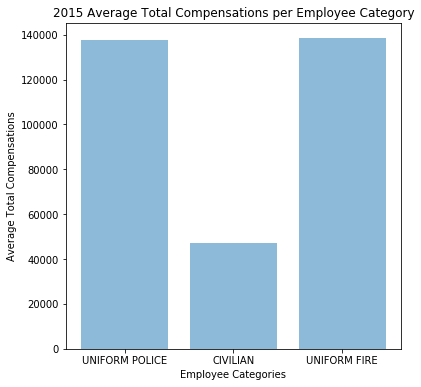

In [121]:
# Bar plot of the list of the average total compensations of categories

fig,ax= plt.subplots(figsize=(6,6))

objects15 = fy15_category_list
y_pos15 = np.arange(len(objects15))
comp15 = fy15_avg_total_comp_list

plt.bar(y_pos15, comp15, align='center', alpha=0.5)
plt.xticks(y_pos15, objects15)
plt.ylabel('Average Total Compensations')
plt.xlabel('Employee Categories')
plt.title('2015 Average Total Compensations per Employee Category')

plt.show()

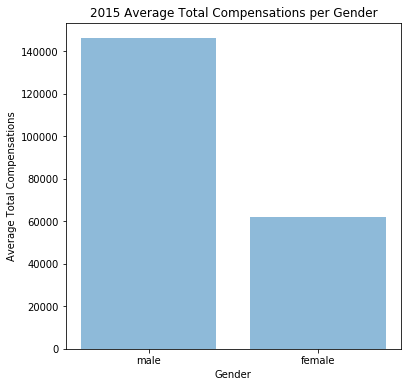

In [124]:
# Bar plot of the list of the average total compensations by gender

fig,ax= plt.subplots(figsize=(6,6))

objects15a = ["male", "female"]
y_pos15a = np.arange(len(objects15a))
comp15a = gender_comp_list

plt.bar(y_pos15a, comp15a, align='center', alpha=0.5)
plt.xticks(y_pos15a,objects15a)
plt.ylabel('Average Total Compensations')
plt.xlabel('Gender')
plt.title('2015 Average Total Compensations per Gender')

plt.show()

## 2016

In [116]:
fy16_category_list=[]
fy16_avg_total_comp_list=[]

for category in fy16_df['EMPLOYEE CATEGORY'].unique():   
    print(category)
    fy16_category_list.append(category)              
    avg_total_compensation16 = round(statistics.mean(fy16_df['FY16 TOTAL COMPENSATION9'][fy16_df['EMPLOYEE CATEGORY'] == category]),2)
    print(avg_total_compensation16)
    fy16_avg_total_comp_list.append(avg_total_compensation16) 

CIVILIAN
48928.93
UNIFORM POLICE
140299.96
UNIFORM FIRE
142042.47


In [140]:
print(max(fy16_avg_total_comp_list))

142042.47


In [141]:
print("Employees under the uniform fire category earned the most total compensation in 2016.")

Employees under the uniform fire category earned the most total compensation in 2016.


In [117]:
fy16_gender_list=[]
fy16_comp_list=[]

for gender in fy16_df['GENDER'].unique():   
    print(gender)
    fy16_gender_list.append(gender)              
    avg_compensation16 = round(statistics.mean(fy16_df['FY16 TOTAL COMPENSATION9'][fy16_df['GENDER'] == gender]),2)
    print(avg_compensation16)
    fy16_comp_list.append(avg_compensation16) 

FEMALE
50450.61
MALE
90518.99
UNKNOWN
11386.47


In [84]:
#Find the total average total compensation for all employees in 2016:

fy16_average_comp = round(statistics.mean(fy16_df['FY16 TOTAL COMPENSATION9']),2)
print("In 2016, San Antonio city employees earned an average of",fy16_average_comp, "total compensation.")

In 2016, San Antonio city employees earned an average of 75972.14 total compensation.


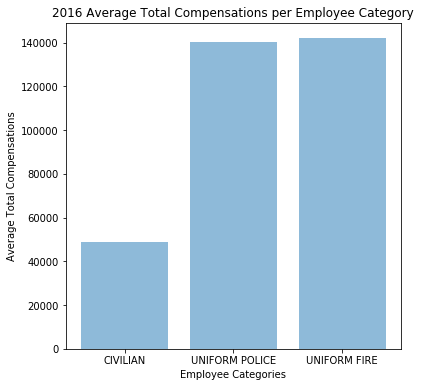

In [120]:
# Bar plot of the list of the average total compensations of categories

fig,ax= plt.subplots(figsize=(6,6))

objects16 = fy16_category_list
y_pos16 = np.arange(len(objects15))
comp16 = fy16_avg_total_comp_list

plt.bar(y_pos16, comp16, align='center', alpha=0.5)
plt.xticks(y_pos16, objects16)
plt.ylabel('Average Total Compensations')
plt.xlabel('Employee Categories')
plt.title('2016 Average Total Compensations per Employee Category')

plt.show()

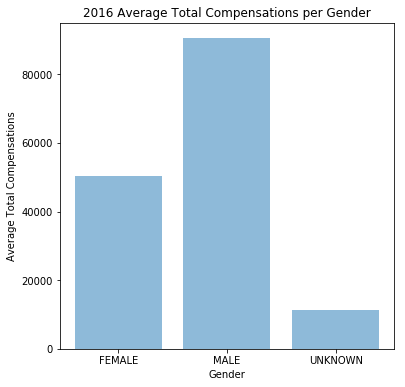

In [125]:
# Bar plot of the list of the average total compensations by gender

fig,ax= plt.subplots(figsize=(6,6))

objects16a = fy16_gender_list
y_pos16a = np.arange(len(objects16a))
comp16a = fy16_comp_list

plt.bar(y_pos16a, comp16a, align='center', alpha=0.5)
plt.xticks(y_pos16a,objects16a)
plt.ylabel('Average Total Compensations')
plt.xlabel('Gender')
plt.title('2016 Average Total Compensations per Gender')

plt.show()

## 2017

In [85]:
fy17_category_list=[]
fy17_avg_total_comp_list=[]

for category in fy17_df['EMPLOYEE CATEGORY'].unique():   
    print(category)
    fy17_category_list.append(category)              
    avg_total_compensation17 = round(statistics.mean(fy17_df['FY17 TOTAL COMPENSATION9'][fy17_df['EMPLOYEE CATEGORY'] == category]),2)
    print(avg_total_compensation17)
    fy17_avg_total_comp_list.append(avg_total_compensation17) 

CIVILIAN
50509.31
UNIFORM POLICE
144091.39
UNIFORM FIRE
137709.44


In [142]:
print(max(fy17_avg_total_comp_list))

144091.39


In [144]:
print("Employees under the uniform police category earned the most total compensation in 2017.")

Employees under the uniform police category earned the most total compensation in 2017.


In [129]:
fy17_gender_list=[]
fy17_comp_list=[]

for gender in fy17_df['GENDER'].unique():   
    print(gender)
    fy17_gender_list.append(gender)              
    avg_compensation17 = round(statistics.mean(fy17_df['FY17 TOTAL COMPENSATION9'][fy17_df['GENDER'] == gender]),2)
    print(avg_compensation17)
    fy17_comp_list.append(avg_compensation17) 

FEMALE
51813.63
MALE
91606.0
UNKNOWN
3262.8


In [88]:
#Find the total average total compensation for all employees in 2017:

fy17_average_comp = round(statistics.mean(fy17_df['FY17 TOTAL COMPENSATION9']),2)
print("In 2017, San Antonio city employees earned an average of",fy17_average_comp, "total compensation.")

In 2017, San Antonio city employees earned an average of 77082.77 total compensation.


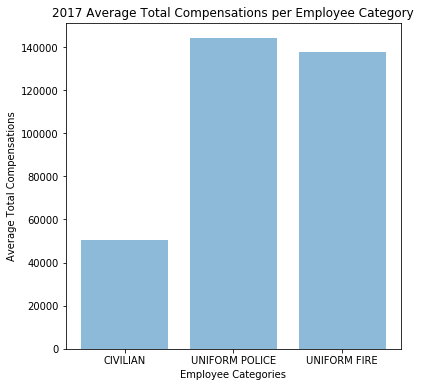

In [126]:
# Bar plot of the list of the average total compensations of categories

fig,ax= plt.subplots(figsize=(6,6))

objects17 = fy17_category_list
y_pos17 = np.arange(len(objects17))
comp17 = fy17_avg_total_comp_list

plt.bar(y_pos17, comp17, align='center', alpha=0.5)
plt.xticks(y_pos17, objects17)
plt.ylabel('Average Total Compensations')
plt.xlabel('Employee Categories')
plt.title('2017 Average Total Compensations per Employee Category')

plt.show()

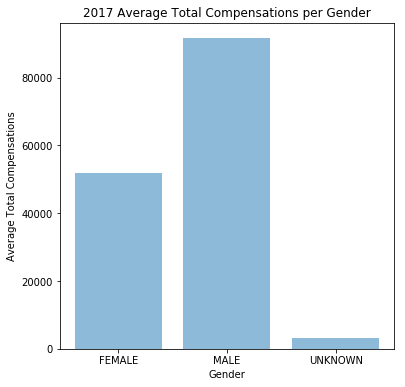

In [130]:
# Bar plot of the list of the average total compensations by gender

fig,ax= plt.subplots(figsize=(6,6))

objects17a = fy17_gender_list
y_pos17a = np.arange(len(objects17a))
comp17a = fy17_comp_list

plt.bar(y_pos17a, comp17a, align='center', alpha=0.5)
plt.xticks(y_pos17a,objects17a)
plt.ylabel('Average Total Compensations')
plt.xlabel('Gender')
plt.title('2017 Average Total Compensations per Gender')

plt.show()

## 2018

In [89]:
fy18_category_list=[]
fy18_avg_total_comp_list=[]

for category in fy18_df['EMPLOYEE CATEGORY'].unique():   
    print(category)
    fy18_category_list.append(category)              
    avg_total_compensation18 = round(statistics.mean(fy18_df['FY18 TOTAL COMPENSATION9'][fy18_df['EMPLOYEE CATEGORY'] == category]),2)
    print(avg_total_compensation18)
    fy18_avg_total_comp_list.append(avg_total_compensation18) 

 CIVILIAN 
60034.54
 UNIFORM 
144304.18
 CIVILIAN & UNIFORM 
75948.74
 CIVILIAN & TEMPORARY 
20877.32
 TEMPORARY 
4695.93
 CIVILIAN & SCHOOL CROSSING GUARD 
22546.47
 SCHOOL CROSSING GUARD 
5447.19


In [145]:
print(max(fy18_avg_total_comp_list))

144304.18


In [146]:
print("Employees under the uniform category earned the most total compensation in 2018.")

Employees under the uniform category earned the most total compensation in 2018.


In [128]:
fy18_gender_list=[]
fy18_comp_list=[]

for gender in fy18_df['GENDER'].unique():   
    print(gender)
    fy18_gender_list.append(gender)              
    avg_compensation18 = round(statistics.mean(fy18_df['FY18 TOTAL COMPENSATION9'][fy18_df['GENDER'] == gender]),2)
    print(avg_compensation18)
    fy18_comp_list.append(avg_compensation18) 

FEMALE
53903.76
MALE
92281.43
UNKNOWN
8972.28


In [92]:
#Find the total average total compensation for all employees in 2018:

fy18_average_comp = round(statistics.mean(fy18_df['FY18 TOTAL COMPENSATION9']),2)
print("In 2018, San Antonio city employees earned an average of",fy18_average_comp, "total compensation.")

In 2018, San Antonio city employees earned an average of 78465.44 total compensation.


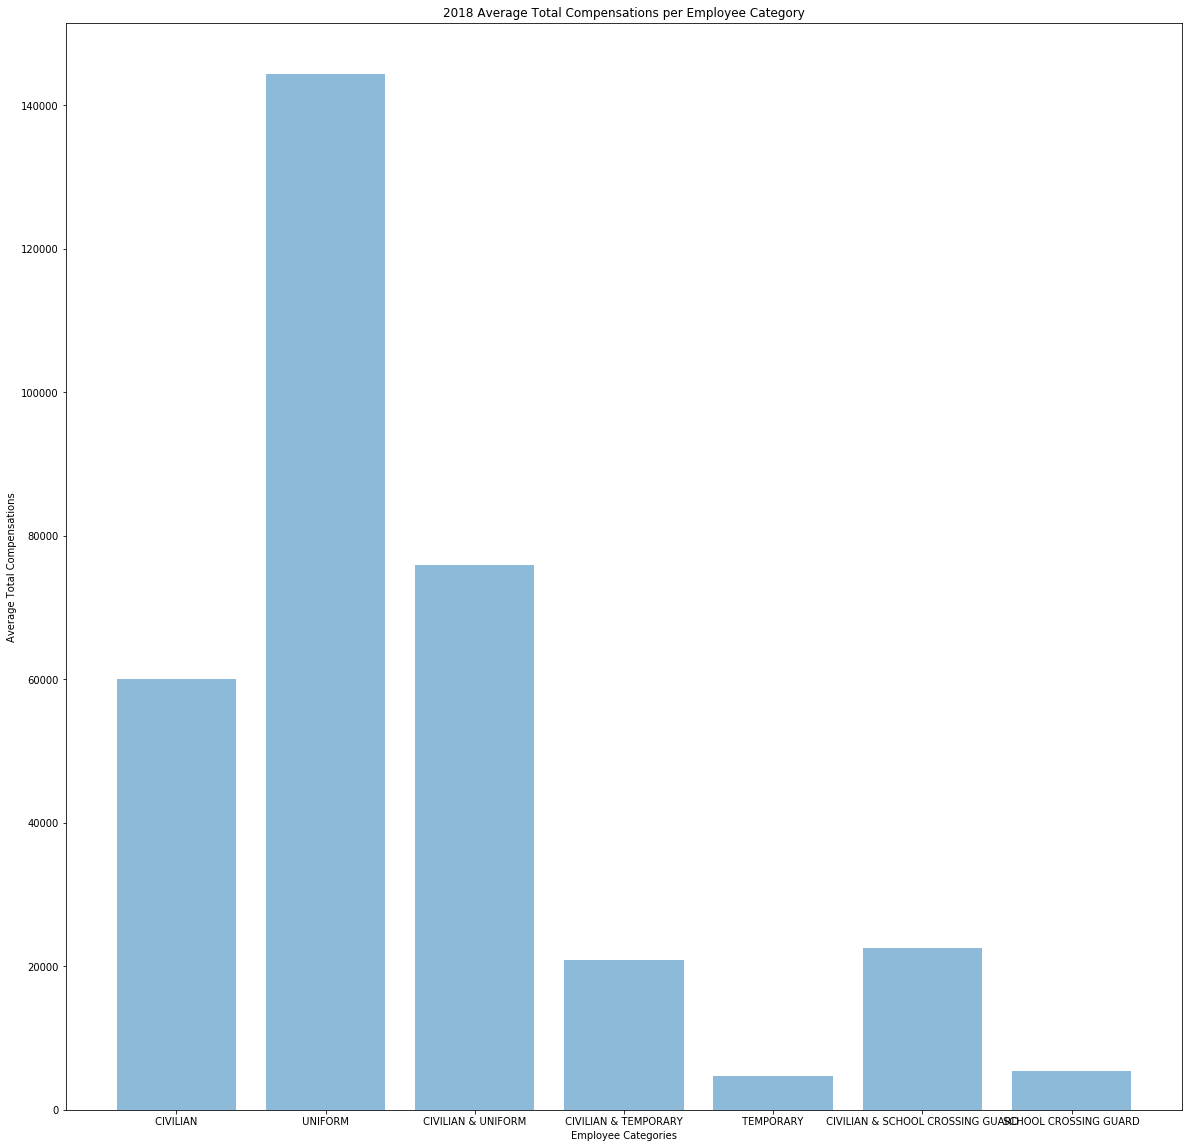

In [133]:
# Bar plot of the list of the average total compensations of categories

fig,ax= plt.subplots(figsize=(20,20))

objects18 = fy18_category_list
y_pos18 = np.arange(len(objects18))
comp18 = fy18_avg_total_comp_list

plt.bar(y_pos18, comp18, align='center', alpha=0.5)
plt.xticks(y_pos18, objects18)
plt.ylabel('Average Total Compensations')
plt.xlabel('Employee Categories')
plt.title('2018 Average Total Compensations per Employee Category')

plt.show()

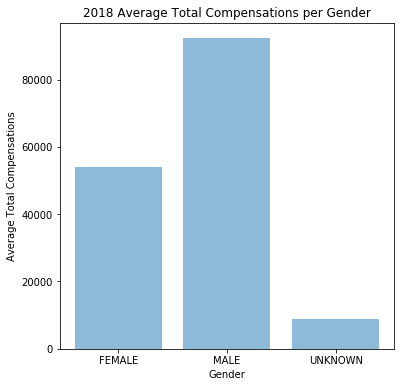

In [134]:
# Bar plot of the list of the average total compensations by gender

fig,ax= plt.subplots(figsize=(6,6))

objects18a = fy18_gender_list
y_pos18a = np.arange(len(objects18a))
comp18a = fy18_comp_list

plt.bar(y_pos18a, comp18a, align='center', alpha=0.5)
plt.xticks(y_pos18a,objects18a)
plt.ylabel('Average Total Compensations')
plt.xlabel('Gender')
plt.title('2018 Average Total Compensations per Gender')

plt.show()

Before testing my proposed hypotheses using one sample t-tests, I will calculate the rate difference in total compensations between males and females (my hypothesis is that males earn 5% more than females). I will also calculate the increate rate in total compensation each year (my hypothesis is that employees' total compensation increased by 2% each year)

## 2014

In [147]:
print(fy14_gender_list,fy14_comp_list)

['FEMALE', 'MALE', 'UNKNOWN'] [47929.54, 88514.95, 7844.98]


In [166]:
females_comp_percentage_14= round((fy14_comp_list[0]/sum(fy14_comp_list))*100,2)
print("Female employees earned", females_comp_percentage_14,"% of the total compensation for all employees in 2014.")

Female employees earned 33.22 % of the total compensation for all employees in 2014.


In [167]:
males_comp_percentage_14= round((fy14_comp_list[1]/sum(fy14_comp_list))*100,2)
print("Male employees earned", males_comp_percentage_14,"% of the total compensation for all employees in 2014.")

Male employees earned 61.35 % of the total compensation for all employees in 2014.


In [169]:
diff= round(abs(males_comp_percentage_14-females_comp_percentage_14),2)
print("Males earned", diff, "% more than females in 2014.")

Males earned 28.13 % more than females in 2014.


We will disregard any values marked as unknown and will focus only on the male and female salaries.To calculate percent difference: take the absolute value of the difference between the 2 numbers divided by the average of the 2 numbers multipled by 100 to get the percentage.

In [163]:
fy14_difference_rate = round((abs(fy14_comp_list[0]-fy14_comp_list[1])/((fy14_comp_list[0]+fy14_comp_list[1])/2))*100,2)
print("There is a",fy14_difference_rate,"% rate difference between male and female employees' salaries in 2014.")
    

There is a 59.49 % rate difference between male and female employees' salaries in 2014.


*This heavily depends on what positions and salaries each male and female holds. Males may hold higher positions with higher salaries than females in these datasets

Repeat for 2015, 2016, 2017, 2018 data.

## 2015

In [172]:
print(gender_list,gender_comp_list)

['MALE', 'FEMALE'] [146129.73, 62228.37]


In [173]:
females_comp_percentage_15= round((gender_comp_list[1]/sum(gender_comp_list))*100,2)
print("Female employees earned", females_comp_percentage_15,"% of the total compensation for all employees in 2015.")

Female employees earned 29.87 % of the total compensation for all employees in 2015.


In [174]:
males_comp_percentage_15= round((gender_comp_list[0]/sum(gender_comp_list))*100,2)
print("Male employees earned", males_comp_percentage_15,"% of the total compensation for all employees in 2015.")

Male employees earned 70.13 % of the total compensation for all employees in 2015.


In [186]:
diff_15= round(abs(males_comp_percentage_15-females_comp_percentage_15),2)
print("Males earned", diff_15, "% more than females in 2015.")

Males earned 40.26 % more than females in 2015.


In [170]:
fy15_difference_rate = round((abs(gender_comp_list[0]-gender_comp_list[1])/((gender_comp_list[0]+gender_comp_list[1])/2))*100,2)
print("There is a",fy15_difference_rate,"% rate difference between male and female employees' salaries in 2015.")

There is a 80.54 % rate difference between male and female employees' salaries in 2015.


## 2016

In [176]:
print(fy16_gender_list,fy16_comp_list)

['FEMALE', 'MALE', 'UNKNOWN'] [50450.61, 90518.99, 11386.47]


In [177]:
females_comp_percentage_16= round((fy16_comp_list[0]/sum(fy16_comp_list))*100,2)
print("Female employees earned", females_comp_percentage_16,"% of the total compensation for all employees in 2016.")

Female employees earned 33.11 % of the total compensation for all employees in 2016.


In [178]:
males_comp_percentage_16= round((fy16_comp_list[1]/sum(fy16_comp_list))*100,2)
print("Male employees earned", males_comp_percentage_16,"% of the total compensation for all employees in 2016.")

Male employees earned 59.41 % of the total compensation for all employees in 2016.


In [185]:
diff_16= round(abs(males_comp_percentage_16-females_comp_percentage_16),2)
print("Males earned", diff_16, "% more than females in 2016.")

Males earned 26.3 % more than females in 2016.


In [180]:
fy16_difference_rate = round((abs(fy16_comp_list[0]-fy16_comp_list[1])/((fy16_comp_list[0]+fy16_comp_list[1])/2))*100,2)
print("There is a",fy16_difference_rate,"% rate difference between male and female employees' salaries in 2016.")

There is a 56.85 % rate difference between male and female employees' salaries in 2016.


## 2017

In [181]:
print(fy17_gender_list,fy17_comp_list)

['FEMALE', 'MALE', 'UNKNOWN'] [51813.63, 91606.0, 3262.8]


In [182]:
females_comp_percentage_17= round((fy17_comp_list[0]/sum(fy17_comp_list))*100,2)
print("Female employees earned", females_comp_percentage_17,"% of the total compensation for all employees in 2017.")

Female employees earned 35.32 % of the total compensation for all employees in 2017.


In [183]:
males_comp_percentage_17= round((fy17_comp_list[1]/sum(fy17_comp_list))*100,2)
print("Male employees earned", males_comp_percentage_17,"% of the total compensation for all employees in 2017.")

Male employees earned 62.45 % of the total compensation for all employees in 2017.


In [184]:
diff_17= round(abs(males_comp_percentage_17-females_comp_percentage_17),2)
print("Males earned", diff_17, "% more than females in 2017.")

Males earned 27.13 % more than females in 2017.


In [187]:
fy17_difference_rate = round((abs(fy17_comp_list[0]-fy17_comp_list[1])/((fy17_comp_list[0]+fy17_comp_list[1])/2))*100,2)
print("There is a",fy17_difference_rate,"% rate difference between male and female employees' salaries in 2017.")

There is a 55.49 % rate difference between male and female employees' salaries in 2017.


## 2018

In [188]:
print(fy18_gender_list,fy18_comp_list)

['FEMALE', 'MALE', 'UNKNOWN'] [53903.76, 92281.43, 8972.28]


In [189]:
females_comp_percentage_18= round((fy18_comp_list[0]/sum(fy18_comp_list))*100,2)
print("Female employees earned", females_comp_percentage_18,"% of the total compensation for all employees in 2018.")

Female employees earned 34.74 % of the total compensation for all employees in 2018.


In [190]:
males_comp_percentage_18= round((fy18_comp_list[1]/sum(fy18_comp_list))*100,2)
print("Male employees earned", males_comp_percentage_18,"% of the total compensation for all employees in 2018.")

Male employees earned 59.48 % of the total compensation for all employees in 2018.


In [191]:
diff_18= round(abs(males_comp_percentage_18-females_comp_percentage_18),2)
print("Males earned", diff_18, "% more than females in 2018.")

Males earned 24.74 % more than females in 2018.


In [192]:
fy18_difference_rate = round((abs(fy18_comp_list[0]-fy18_comp_list[1])/((fy18_comp_list[0]+fy18_comp_list[1])/2))*100,2)
print("There is a",fy18_difference_rate,"% rate difference between male and female employees' salaries in 2018.")

There is a 52.51 % rate difference between male and female employees' salaries in 2018.


Next, manually calculate the rate increase/decrease in total compensation between each year.

In [195]:
#put into a dataframe so it's easier to see the total average compensations per year
#ref:https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

year_comp = [["2014", fy14_average_comp], ["2015",fy15_average_comp],["2016",fy16_average_comp],["2017",fy17_average_comp],["2018",fy18_average_comp]]
df_comp = pd.DataFrame(year_comp, columns = ['Year', 'Average Total Compensations']) 
df_comp



,Year,Average Total Compensations
0,2014,74259.40
1,2015,74648.85
2,2016,75972.14
3,2017,77082.77
4,2018,78465.44


ref: https://www.skillsyouneed.com/num/percent-change.html


To calculate percentage increase:
(New Number - Old Number)/(Old Number)*100

In [197]:
#Rate Increase in total compensation between 2014 and 2015:

rate1 = round(((fy15_average_comp-fy14_average_comp)/fy14_average_comp)*100,2)
print("There is a", rate1, "% increase in average total compensations between 2014 and 2015.")

There is a 0.52 % increase in average total compensations between 2014 and 2015.


In [198]:
#Rate Increase in total compensation between 2015 and 2016:

rate2 = round(((fy16_average_comp-fy15_average_comp)/fy15_average_comp)*100,2)
print("There is a", rate2, "% increase in average total compensations between 2015 and 2016.")

There is a 1.77 % increase in average total compensations between 2015 and 2016.


In [199]:
#Rate Increase in total compensation between 2016 and 2017:

rate3 = round(((fy17_average_comp-fy16_average_comp)/fy16_average_comp)*100,2)
print("There is a", rate3, "% increase in average total compensations between 2016 and 2017.")

There is a 1.46 % increase in average total compensations between 2016 and 2017.


In [200]:
#Rate Increase in total compensation between 2017 and 2018:

rate4 = round(((fy18_average_comp-fy17_average_comp)/fy17_average_comp)*100,2)
print("There is a", rate4, "% increase in average total compensations between 2017 and 2018.")

There is a 1.79 % increase in average total compensations between 2017 and 2018.


In [203]:
#Total average rate increase in total compensation:
avg_total_rate_increase = (rate1+rate2+rate3+rate4)/4
print("There is an average rate increase in avaerage total compensation by",avg_total_rate_increase,"%.")


There is an average rate increase in avaerage total compensation by 1.385 %.


I will use a one sampled t test to either reject or accept the null hypotheses at an alpha level of .05 for only my first hypothesis.

"A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features"

## First Hypothesis: (One Sample T-Test)

H0 (null hypothesis): Each year male employees earned 5% more than female employees

HA (alternative hypothesis): Each year male employees did not earn 5% more than female employees (alpha level .05)

## 2014

In [204]:
#ref:https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

tset, pval = ttest_1samp(fy14_comp_list,0)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.17489637750219358
we are accepting null hypothesis


Each year, male employees earned more than female employees overall, and by more than 5%.

Repeat for 2015, 2016, 2017, and 2018. 

## 2015

In [205]:
tset, pval = ttest_1samp(gender_comp_list,0)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.24370659841214687
we are accepting null hypothesis


## 2016

In [206]:
tset, pval = ttest_1samp(fy16_comp_list,0)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.1562529537008911
we are accepting null hypothesis


## 2017

In [207]:
tset, pval = ttest_1samp(fy17_comp_list,0)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.1957125720292901
we are accepting null hypothesis


## 2018

In [208]:
tset, pval = ttest_1samp(fy18_comp_list,0)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.16473214527831226
we are accepting null hypothesis


Although I predicted that male employees earned 5% more than female employees each year, male employees actually earned significantly more than female employees, hence we can accept the null hypothesis. 

## Second Hypothesis:

H0 (null hypothesis): City employee's salaries increased by 2% each year

HA (alternative hypothesis): City employee's salaries did not increase by 2% each year

Instead of using a t-test to test the rate increase in total average compensation for San Antonio employees, since I already manually calculated the rate increase in total average compensations each year from 2014 till 2018, we can conclude that city employee's salaries did not increase by 2% each year. The average total increase in salaries from 2014 to 2018 was by 1.385%, which is less than 2%. We will reject the null hypothesis. 

This data analysis helped me gain more knowledge and experience in exploratory data analysis. The inclusion of hypotheses and hypothesis further extended my knowledge of how testing values and testing hypothesis is crucial to draw conclusions frm datasets. I also gained more knowledge in understanding the importance of cleaning up datasets to conduct successfull data analysis. 